In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

news_data = pd.read_csv('./OnlineNewsPopularity.csv')
news_data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [2]:
news_data.shape

(39644, 61)

In [3]:
news_data = news_data.drop(['url'], axis=1)

In [4]:
#Usuwanie wartości odstających
Q1 = news_data[' shares'].quantile(0.25)
Q3 = news_data[' shares'].quantile(0.75)
IQR = Q3 - Q1
LTV= Q1 - (1.5 * IQR)
UTV= Q3 + (1.5 * IQR)
fixedData = news_data.drop(news_data[news_data[' shares'] > UTV].index)
fixedData.shape

(35103, 60)

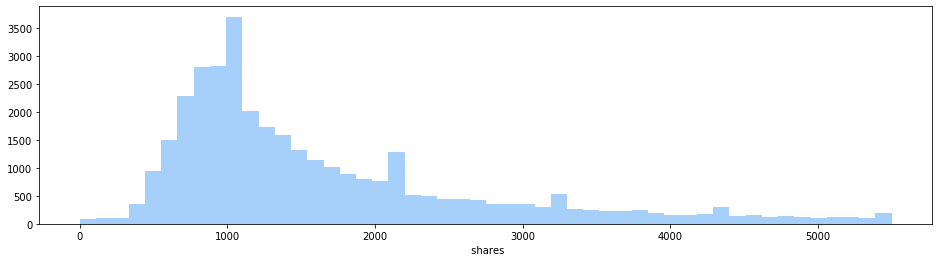

In [5]:
plt.subplots(figsize=(16,4))
sns.distplot(fixedData[' shares'], hist=True, kde=False, color='#2289F0')

In [6]:
#USTALENIE DANYCH WEJŚCIOWYCH I TARGETU
data = fixedData.iloc[1:,1:-1]
target = fixedData.iloc[1:,-1]
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
5,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,4.359459,...,0.350610,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286


In [7]:
target.head()

1     711
2    1500
3    1200
4     505
5     855
Name:  shares, dtype: int64

In [8]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
data   = scaler.fit_transform(data)
data

array([[0.38888889, 0.03284389, 0.6047431 , ..., 0.5       , 1.        ,
        0.        ],
       [0.38888889, 0.02717671, 0.57512955, ..., 0.5       , 1.        ,
        0.        ],
       [0.38888889, 0.06839258, 0.5037879 , ..., 0.5       , 1.        ,
        0.        ],
       ...,
       [0.44444444, 0.05692942, 0.51635516, ..., 0.56818182, 0.09090909,
        0.13636364],
       [0.22222222, 0.08784132, 0.53949331, ..., 0.5       , 1.        ,
        0.        ],
       [0.44444444, 0.02022154, 0.70198678, ..., 0.625     , 0.33333333,
        0.25      ]])

In [9]:
#DZIELENIE DANYCH NA MODELE UCZĄCE I TESTOWE

from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.10)
print("Training dataset:")
print("data_train:", data_train.shape)
print("target_train:", target_train.shape)
print("\nTesting dataset:")
print("data_test:", data_test.shape)
print("target_test:", target_test.shape)

Training dataset:
data_train: (31591, 58)
target_train: (31591,)

Testing dataset:
data_test: (3511, 58)
target_test: (3511,)


In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

news_network = MLPRegressor(solver='adam', alpha=1e-5, 
                     hidden_layer_sizes=(50,50 ),verbose=True, random_state=1, max_iter=5000, tol=1e-7)
news_network.fit(data_train, target_train)

mse =  mean_squared_error(target_test, news_network.predict(data_test))
rmse = np.sqrt(mse)
print("Średni błąd kwadratu wyuczonego modelu: %.2f" %  mse)
print("Pierwiastek średniego błędu kwadratowego: %.2f" %  rmse)

Iteration 1, loss = 1858179.75508696
Iteration 2, loss = 826665.20848357
Iteration 3, loss = 596078.43239721
Iteration 4, loss = 585839.34981843
Iteration 5, loss = 577875.99005682
Iteration 6, loss = 572023.60435248
Iteration 7, loss = 567593.46699285
Iteration 8, loss = 564494.05464245
Iteration 9, loss = 562147.37672121
Iteration 10, loss = 560490.01002522
Iteration 11, loss = 559253.49822100
Iteration 12, loss = 558137.31475145
Iteration 13, loss = 557223.36019001
Iteration 14, loss = 556291.34908090
Iteration 15, loss = 555555.07000675
Iteration 16, loss = 554890.10070934
Iteration 17, loss = 554503.79302282
Iteration 18, loss = 553846.89549293
Iteration 19, loss = 553546.48908717
Iteration 20, loss = 553080.10023478
Iteration 21, loss = 552746.27513907
Iteration 22, loss = 552329.91565706
Iteration 23, loss = 552019.67200475
Iteration 24, loss = 551907.34465701
Iteration 25, loss = 551471.95991984
Iteration 26, loss = 551265.78598072
Iteration 27, loss = 551065.90712449
Iteration

Iteration 220, loss = 529112.86465268
Iteration 221, loss = 529008.12451953
Iteration 222, loss = 529019.87285859
Iteration 223, loss = 528939.29143211
Iteration 224, loss = 528766.00610982
Iteration 225, loss = 529041.30414657
Iteration 226, loss = 528808.39552220
Iteration 227, loss = 528528.64956454
Iteration 228, loss = 529061.96947832
Iteration 229, loss = 528410.81440598
Iteration 230, loss = 528152.98460393
Iteration 231, loss = 528325.85568716
Iteration 232, loss = 528106.58241040
Iteration 233, loss = 527955.55051529
Iteration 234, loss = 528147.69296989
Iteration 235, loss = 527997.24183004
Iteration 236, loss = 527878.33259989
Iteration 237, loss = 527704.20771508
Iteration 238, loss = 528098.16682769
Iteration 239, loss = 527711.57313031
Iteration 240, loss = 527748.61627180
Iteration 241, loss = 527713.98586590
Iteration 242, loss = 527486.26572226
Iteration 243, loss = 527385.03566398
Iteration 244, loss = 526970.28330133
Iteration 245, loss = 527593.49503456
Iteration 24

In [11]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(target_test, news_network.predict(data_test)))
# 50,50 solver=adam, MinMaxScaled, max_iter 5000 -> 0.14 
# Sieć neuronowa ma lepszy wynik niż w regresji liniowej

Variance score: 0.14


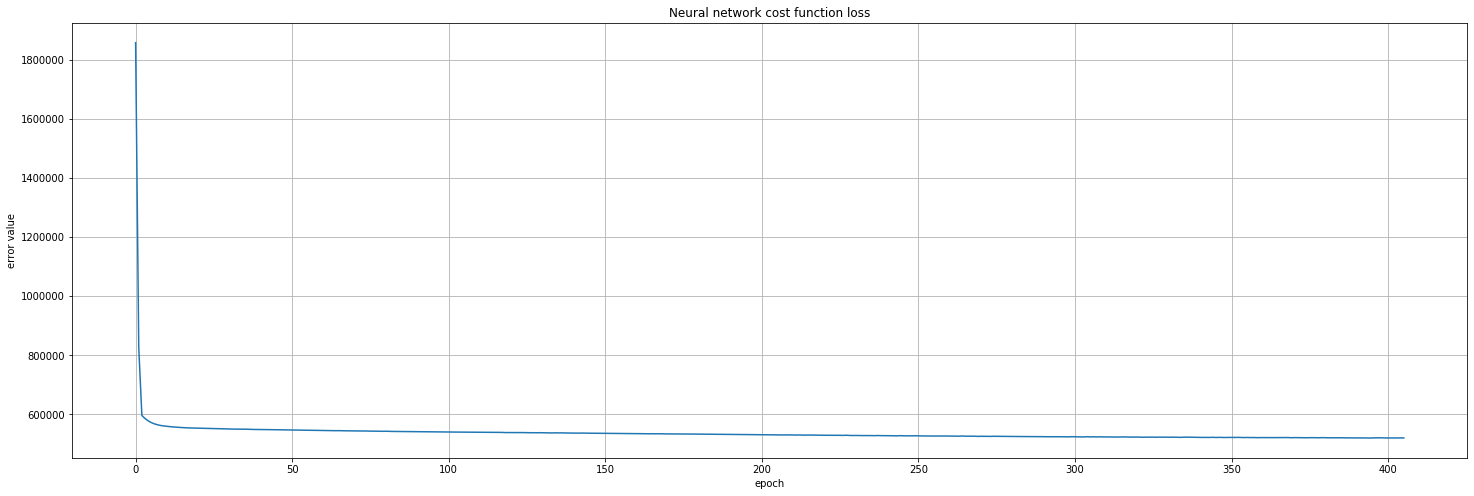

In [14]:
import matplotlib.pyplot as plt
plt.plot(news_network.loss_curve_)
plt.title('Neural network cost function loss')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =25.0
fig_size[1] = 8.0
plt.xlabel('epoch'); plt.ylabel('error value'); plt.grid();


Wykres predykcji


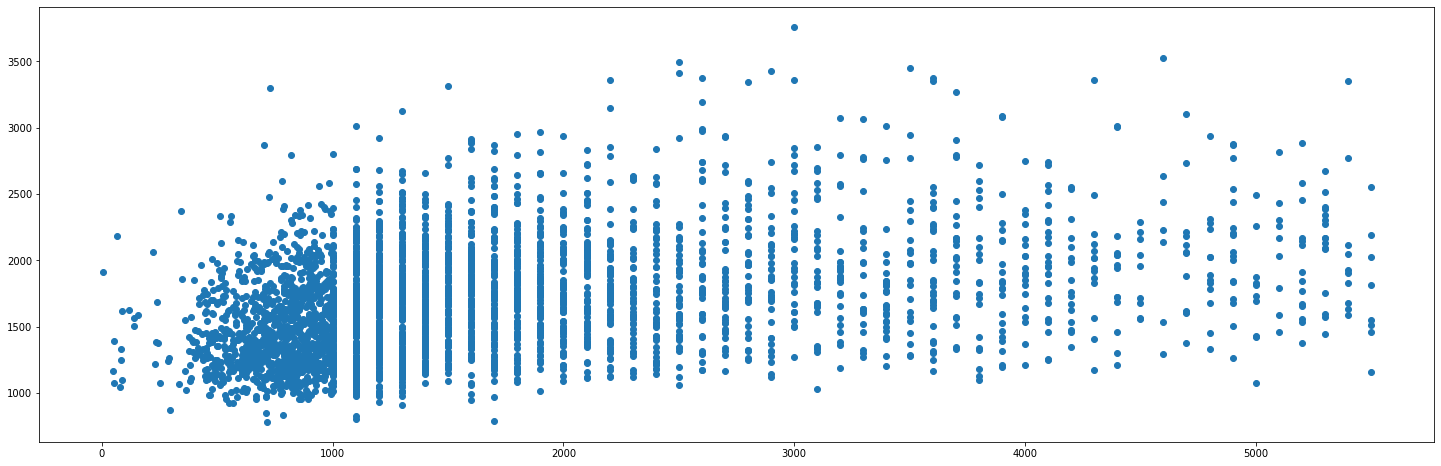

In [15]:
#WYKRES PREDYKCJI
plt.scatter(target_test, news_network.predict(data_test))
print("Wykres predykcji")


In [16]:
df_someXdata = pd.DataFrame(news_network.predict(data_train),list(target_train) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_someXdata_LR.head(11)

,Actual shares,Predicted shares
0,4500,2094.889819
1,1100,1268.351038
2,1500,2201.186220
3,1800,1200.547584
4,436,1469.750528
5,889,1862.721503
6,424,1243.337618
7,1800,1296.046838
8,1300,1959.029713
9,1200,2099.698434
